In [46]:
import numpy as np 
import pandas as pd 

## Read data from file csv

In [47]:
oil = pd.read_csv('data/oil.csv')
sample = pd.read_csv('data/sample_submission.csv')
holidays = pd.read_csv('data/holidays_events.csv')
stores = pd.read_csv('data/stores.csv')
train = pd.read_csv('data/train.csv') 
transactions = pd.read_csv('data/transactions.csv')
test = pd.read_csv('data/test.csv') 

In [48]:
print('Oil prices \n', oil.head())
print('Sample \n',sample.head())
print('holidays \n', holidays.head())
print('stores \n', transactions.head)
print('train \n', train.head())

Oil prices 
          date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
Sample 
         id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0
holidays 
          date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
stores 
 <bound method NDFrame.head of              date  store_nbr  transactions
0      2013-01-01         25           770
1

In [49]:
def str_to_num(data):
    data1 = data.dropna().unique()
    lis = range(1,len(data1)+1)
    zipper = dict(zip(data1,lis))
    print(zipper)
    liss = []
    for ele in data:
        x = zipper[ele]
        liss.append(x)
    return liss
holidays['type'] = str_to_num(holidays['type'])
holidays.head()

{'Holiday': 1, 'Transfer': 2, 'Additional': 3, 'Bridge': 4, 'Work Day': 5, 'Event': 6}


,date,type,locale,locale_name,description,transferred
0,2012-03-02,1,Local,Manta,Fundacion de Manta,False
1,2012-04-01,1,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,1,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,1,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,1,Local,Riobamba,Cantonizacion de Riobamba,False


In [50]:
stores['type'] = str_to_num(stores['type'])
train['family'] = str_to_num(train['family'])
stores['city'] = str_to_num(stores['city'])
holidays['locale'] = str_to_num(holidays['locale'])
holidays['locale_name'] = str_to_num(holidays['locale_name'])
holidays['transferred'] = str_to_num(holidays['transferred'])

{'D': 1, 'B': 2, 'C': 3, 'E': 4, 'A': 5}
{'AUTOMOTIVE': 1, 'BABY CARE': 2, 'BEAUTY': 3, 'BEVERAGES': 4, 'BOOKS': 5, 'BREAD/BAKERY': 6, 'CELEBRATION': 7, 'CLEANING': 8, 'DAIRY': 9, 'DELI': 10, 'EGGS': 11, 'FROZEN FOODS': 12, 'GROCERY I': 13, 'GROCERY II': 14, 'HARDWARE': 15, 'HOME AND KITCHEN I': 16, 'HOME AND KITCHEN II': 17, 'HOME APPLIANCES': 18, 'HOME CARE': 19, 'LADIESWEAR': 20, 'LAWN AND GARDEN': 21, 'LINGERIE': 22, 'LIQUOR,WINE,BEER': 23, 'MAGAZINES': 24, 'MEATS': 25, 'PERSONAL CARE': 26, 'PET SUPPLIES': 27, 'PLAYERS AND ELECTRONICS': 28, 'POULTRY': 29, 'PREPARED FOODS': 30, 'PRODUCE': 31, 'SCHOOL AND OFFICE SUPPLIES': 32, 'SEAFOOD': 33}
{'Quito': 1, 'Santo Domingo': 2, 'Cayambe': 3, 'Latacunga': 4, 'Riobamba': 5, 'Ibarra': 6, 'Guaranda': 7, 'Puyo': 8, 'Ambato': 9, 'Guayaquil': 10, 'Salinas': 11, 'Daule': 12, 'Babahoyo': 13, 'Quevedo': 14, 'Playas': 15, 'Libertad': 16, 'Cuenca': 17, 'Loja': 18, 'Machala': 19, 'Esmeraldas': 20, 'Manta': 21, 'El Carmen': 22}
{'Local': 1, 'Regional'

## Processing missing value by KNN for oil['dcoilwtico']

> KNNImputer is a data transform that is first configured based on the method used to estimate the missing values. The default distance measure is a Euclidean distance measure that is NaN aware, e.g. will not include NaN values when calculating the distance between members of the training dataset 
> https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/#:~:text=KNNImputer%20is%20a%20data%20transform,members%20of%20the%20training%20dataset.

In [51]:
from sklearn.impute import KNNImputer 
X = oil['dcoilwtico'].values.reshape((203,6))
imputer = KNNImputer(n_neighbors=5, weights = 'distance')
z = imputer.fit_transform(X)
z = z.reshape((1218,1))
oil['dcoilwtico'] = z
oil

,date,dcoilwtico
0,2013-01-01,93.987927
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-07,93.200000
...,...,...
1213,2017-08-25,47.650000
1214,2017-08-28,46.400000
1215,2017-08-29,46.460000
1216,2017-08-30,45.960000


## Merge data by 'date' 

In [61]:
training = pd.merge(train,oil, how ='left' ,on = 'date')
training = pd.merge(training, holidays , how = 'left' , on='date') 
training = pd.merge(training, transactions , how='left' , on =['date','store_nbr']) 
training = pd.merge(training, stores, how = 'left' , on ='store_nbr') 
training.rename(columns={'type_x':'holiday_type', 'type_y':'store_type'}, inplace = True)
training.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,transactions,city,state,store_type,cluster
0,0,2013-01-01,1,1,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13
1,1,2013-01-01,1,2,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13
2,2,2013-01-01,1,3,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13
3,3,2013-01-01,1,4,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13
4,4,2013-01-01,1,5,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,NaN,1,Pichincha,1,13


In [59]:
print(training.shape)
training.isnull().sum() 

(3054348, 17)


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       878526
type_x          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
transactions     249117
city                  0
state                 0
type_y                0
cluster               0
dtype: int64

In [62]:
training[['holiday_type']] = training[['holiday_type']].fillna(0)
training['transactions']=training['transactions'].fillna(0)
#backfill / bfill: use next valid observation to fill gap.
training['dcoilwtico']=training['dcoilwtico'].fillna(method='bfill')
training['locale_name']= training['locale_name'].fillna(0)
training.head()


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,transactions,city,state,store_type,cluster
0,0,2013-01-01,1,1,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
1,1,2013-01-01,1,2,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
2,2,2013-01-01,1,3,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
3,3,2013-01-01,1,4,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13
4,4,2013-01-01,1,5,0.0,0,93.987927,1.0,3.0,15.0,Primer dia del ano,1.0,0.0,1,Pichincha,1,13


In [63]:
training.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico            0
holiday_type          0
locale          2551824
locale_name           0
description     2551824
transferred     2551824
transactions          0
city                  0
state                 0
store_type            0
cluster               0
dtype: int64

In [64]:
training['locale']=training['locale'].fillna(0)
training['transferred']=training['transferred'].fillna(0)
training.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico            0
holiday_type          0
locale                0
locale_name           0
description     2551824
transferred           0
transactions          0
city                  0
state                 0
store_type            0
cluster               0
dtype: int64

In [67]:
#training.describe()
training.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'holiday_type', 'locale', 'locale_name', 'description',
       'transferred', 'transactions', 'city', 'state', 'store_type',
       'cluster'],
      dtype='object')

/Users/benphan/opt/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/benphan/opt/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/benphan/opt/anaconda3/envs/ai/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

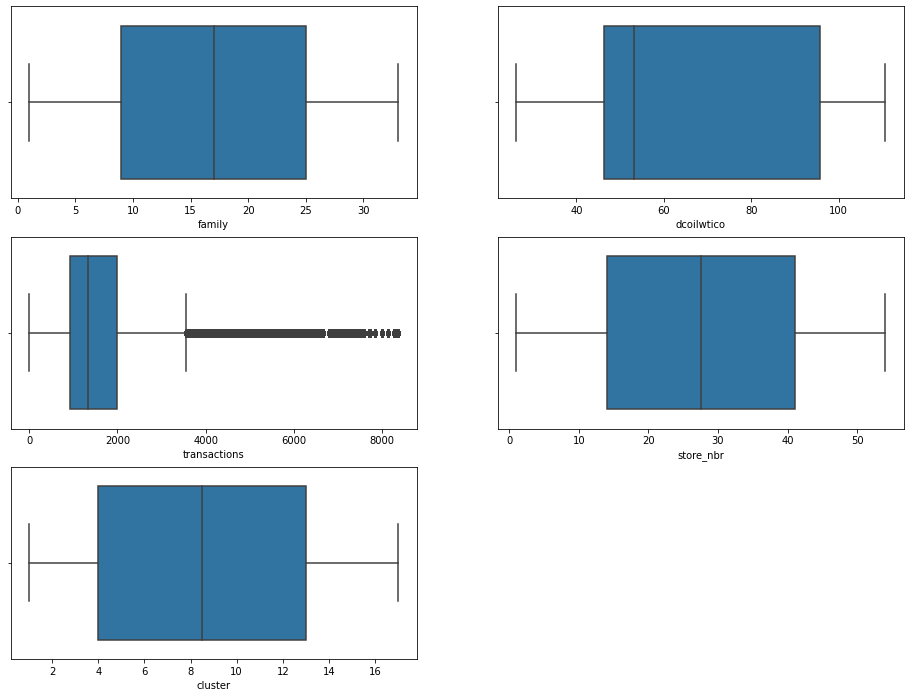

In [75]:
import seaborn as sns 
import matplotlib.pyplot as plt 
vars = ['family','dcoilwtico', 'transactions', 'store_nbr',
       'cluster']
plt.figure(figsize=(16,12))
for i,var in enumerate(vars):
  plt.subplot(3,2,i+1)
  sns.boxplot(training[var].astype(float))


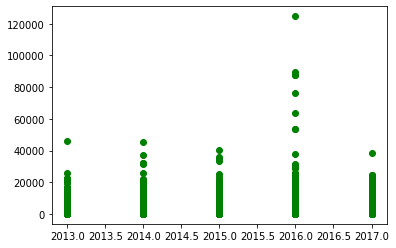

In [89]:
#plt.scatter(training['date'],training['sales'], color='green') 
training['year'] = pd.DatetimeIndex(training['date']).year 
plt.scatter(training['year'],training['sales'], color='green') 

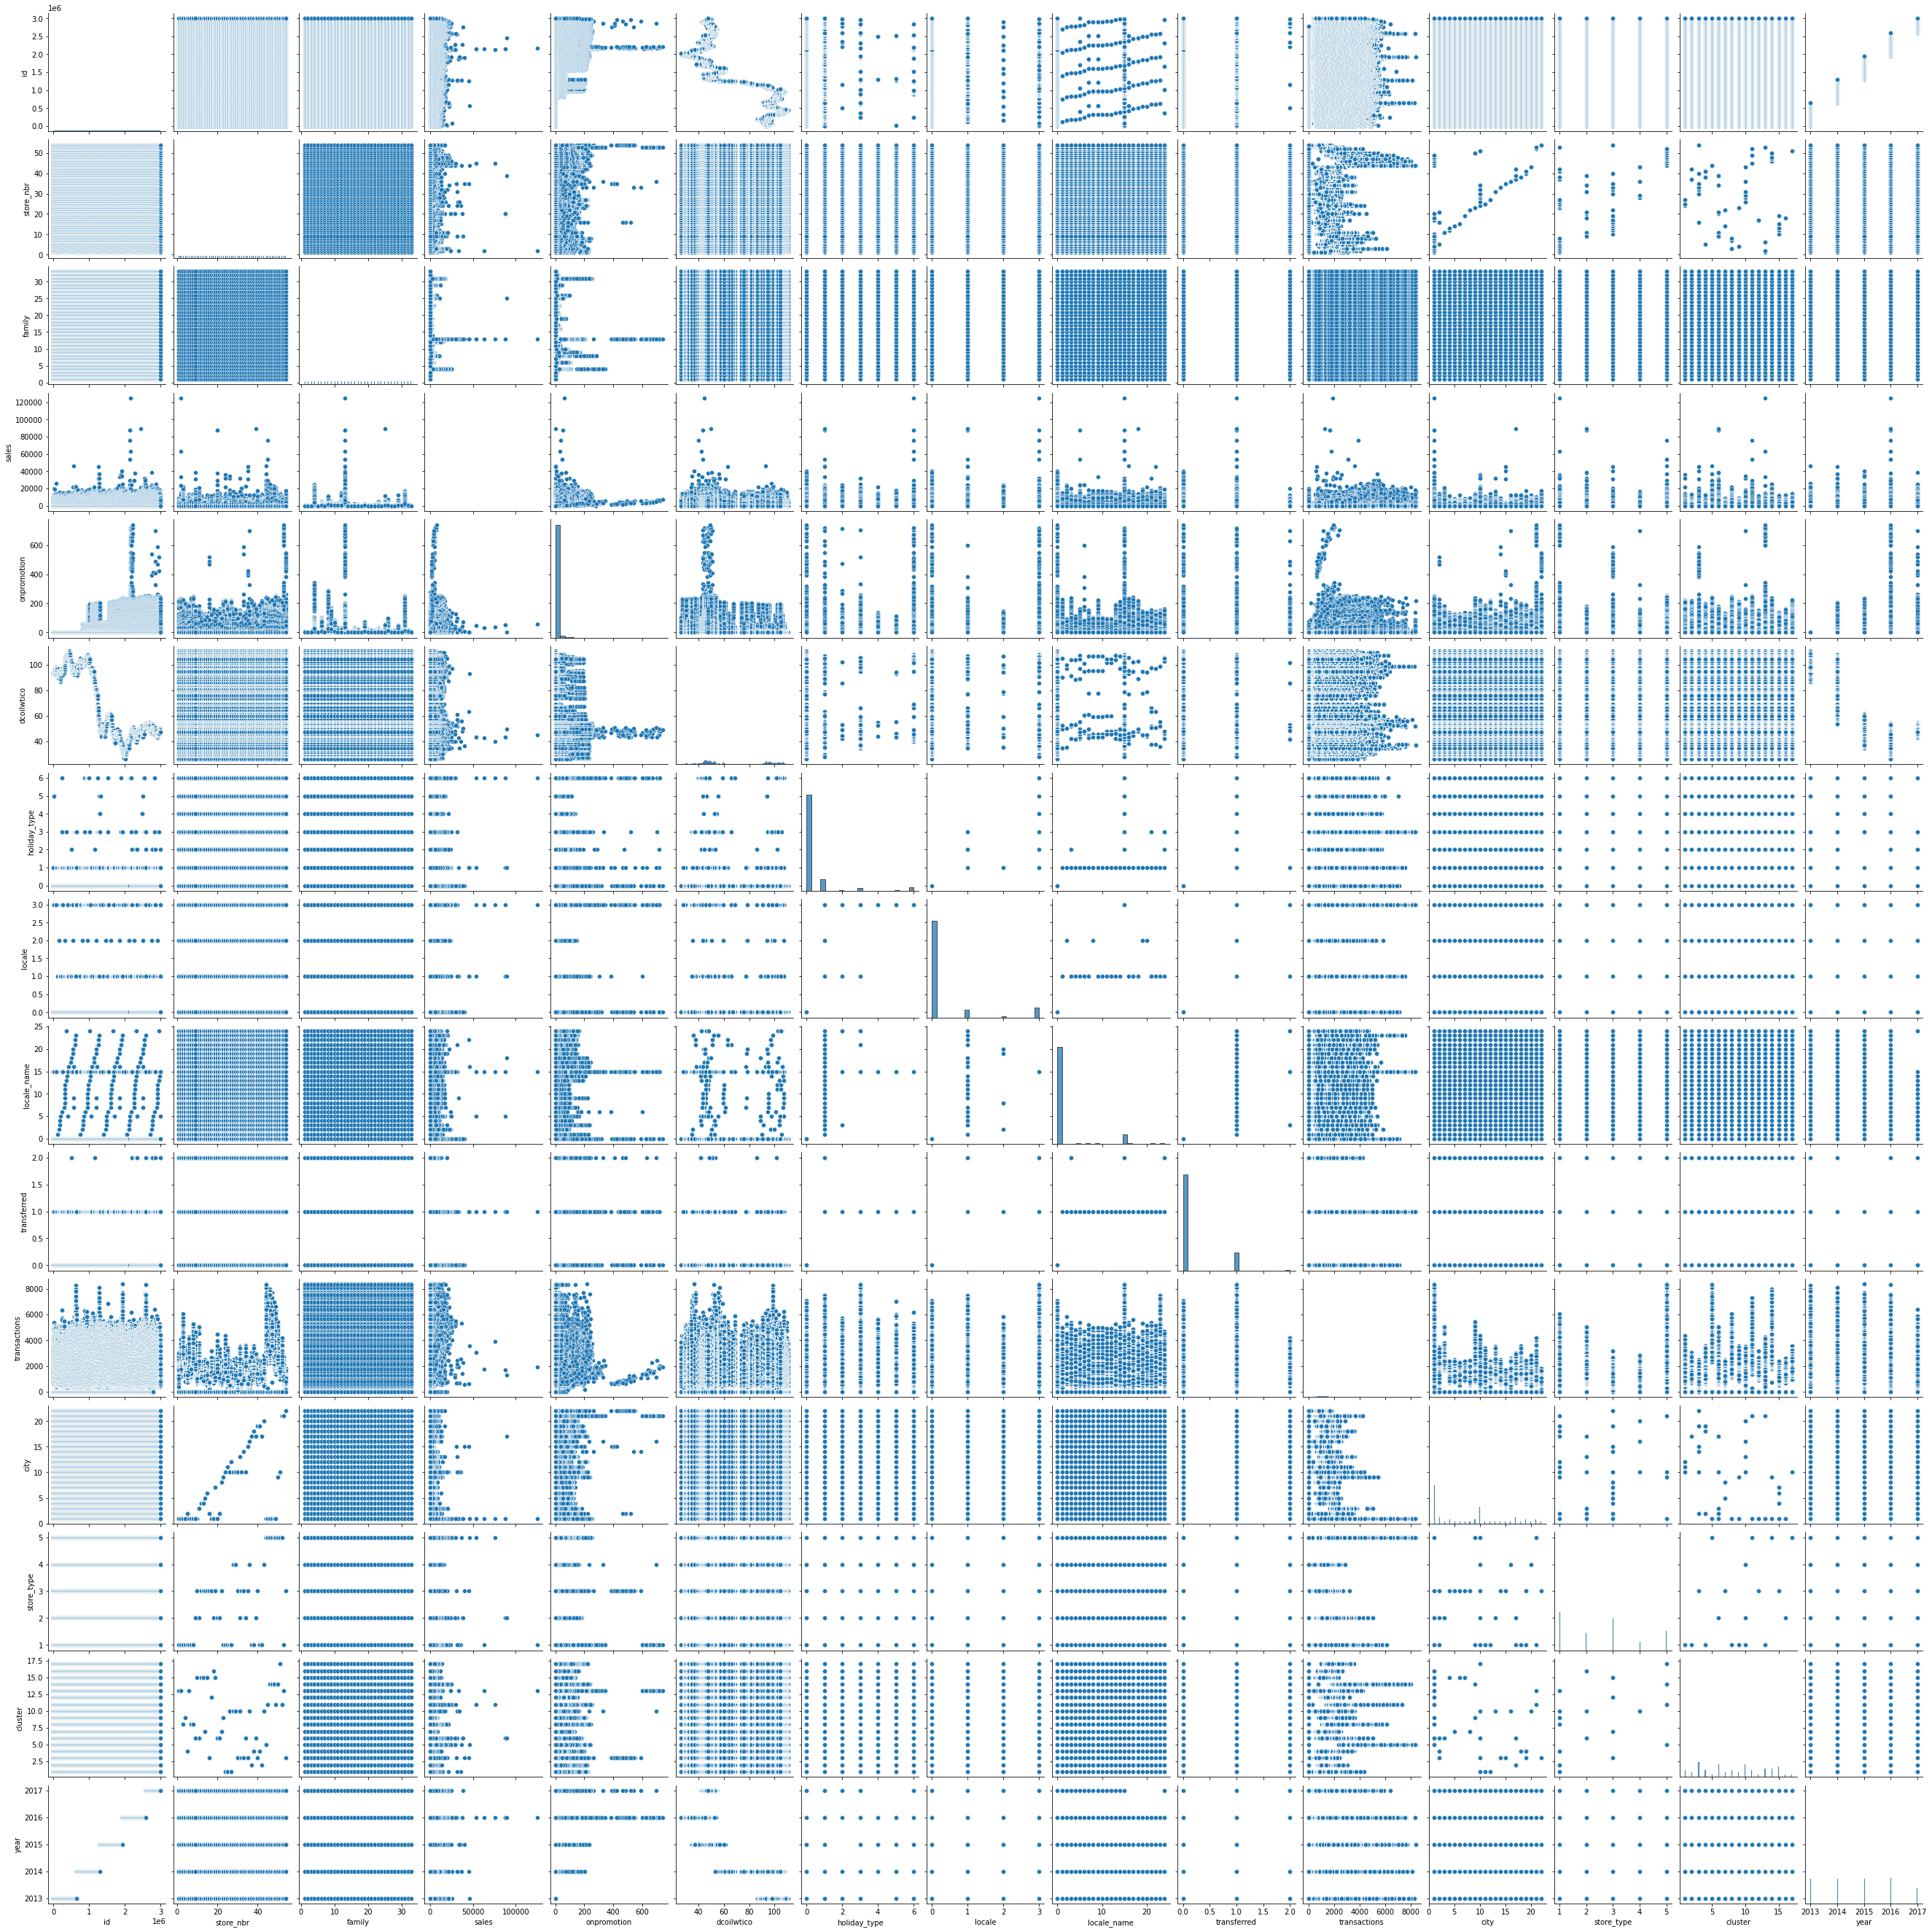

In [90]:
sns.pairplot(training)

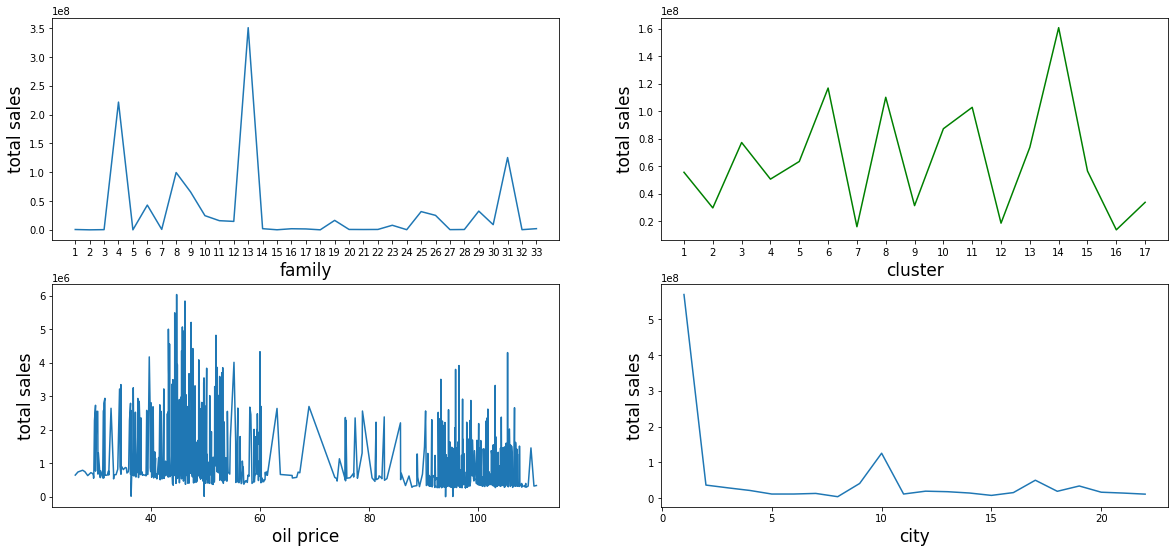

In [92]:
famsum = training[['sales','family']].groupby('family').sum()
oilsum = training[['sales','dcoilwtico']].groupby('dcoilwtico').sum()
oil1 = sorted(training['dcoilwtico'].unique())
family = sorted(training['family'].unique())
clussum = training[['sales','cluster']].groupby('cluster').sum()
cluster = sorted(training['cluster'].unique())
citsum = training[['sales','city']].groupby('city').sum()
cities = sorted(training['city'].unique())
fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,sharex=False, sharey=False, figsize=(20,9))
ax0.set_xticks(family)
ax1.set_xticks(cluster)
ax0.set_xlabel('family', fontsize=17)
ax1.set_xlabel('cluster', fontsize=17)
ax1.set_ylabel('total sales', fontsize=17)
ax0.set_ylabel('total sales', fontsize=17)
ax0.plot(family,famsum)
ax1.plot(cluster,clussum, color='green')
ax2.set_ylabel('total sales', fontsize=17)
ax2.set_xlabel('oil price', fontsize=17)
ax2.plot(oil1,oilsum)
ax3.set_ylabel('total sales', fontsize=17)
ax3.set_xlabel('city', fontsize=17)
ax3.plot(cities,citsum)


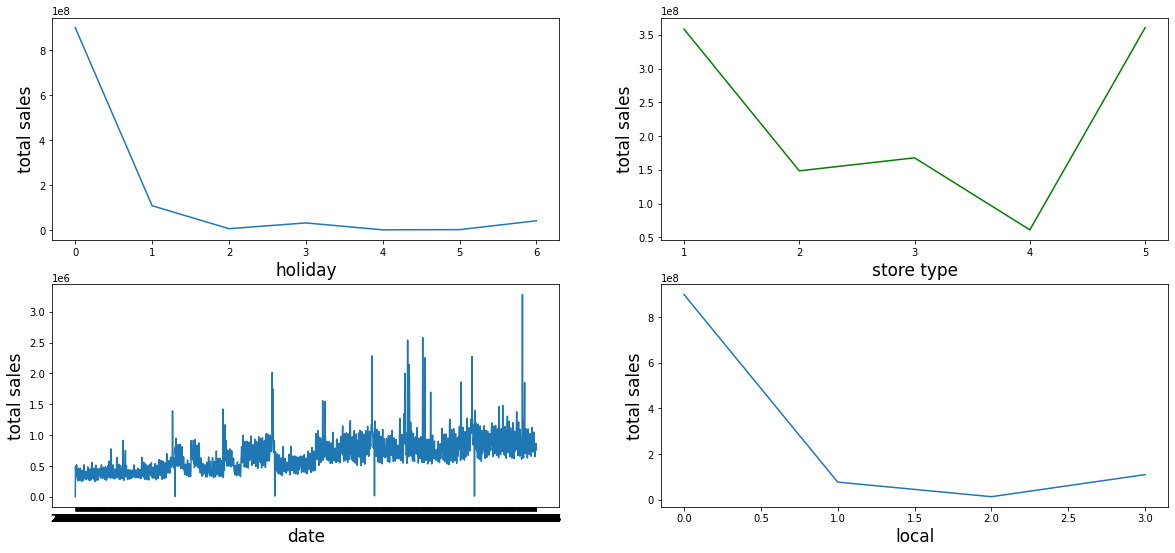

In [93]:
training['date']=training['date'].str.replace('-','')
famsum = training[['sales','holiday_type']].groupby('holiday_type').sum()
oilsum = training[['sales','date']].groupby('date').sum()
oil1 = sorted(training['date'].unique())
family = sorted(training['holiday_type'].unique())
clussum = training[['sales','store_type']].groupby('store_type').sum()
cluster = sorted(training['store_type'].unique())
loc = sorted(training['locale'].unique())
locsum = training[['sales','locale']].groupby('locale').sum()
oil1 = sorted(training['date'].unique())
fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,sharex=False, sharey=False, figsize=(20,9))
ax0.set_xticks(family)
ax1.set_xticks(cluster)
ax0.set_xlabel('holiday', fontsize=17)
ax1.set_xlabel('store type', fontsize=17)
ax1.set_ylabel('total sales', fontsize=17)
ax0.set_ylabel('total sales', fontsize=17)
ax0.plot(family,famsum)
ax1.plot(cluster,clussum, color='green')
ax2.set_ylabel('total sales', fontsize=17)
ax2.set_xlabel('date', fontsize=17)
ax2.plot(oil1,oilsum)
ax3.set_ylabel('total sales', fontsize=17)
ax3.set_xlabel('local', fontsize=17)
ax3.plot(loc,locsum)

In [ ]:
plt.figure(figsize=(16,9)) # chủ yếu để cho biết trọng số của những thằng nào đang cao rồi từ đó mình có thể áp dụng normalization
sns.heatmap(training)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(training.corr(), annot=True, cmap='coolwarm', linewidths=2) 
# in ra hệ số tương quang

In [ ]:
X = training.drop(['label'], axis=1)
# X = (X-X.mean())/X.var()
X = (X-X.min())/(X.max()-X.min())
X

## Training

### XGBRegressor method

In [94]:
from sklearn.model_selection import train_test_split 
x = training[['id', 'date','store_nbr', 'family', 'onpromotion',
        'transactions','cluster']]
Y=training['sales']
X_train,X_test,y_train,y_test = train_test_split(x.values,Y.values,test_size = 0.2)
from xgboost import XGBRegressor
model = XGBRegressor()
# from sklearn.ensemble import RandomForestRegressor
# RFR = RandomForestRegressor(n_estimators = 9)
rr1 = model.fit(X_train,y_train)
rr1.score(X_test, y_test)

0.9364593813521329

### Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(n_estimators = 9) 
model1 = modelRFR.fit(X_train, y_train)  
model1.score(X_test, y_test) 


0.957066444605851

### Linear Regression and Ridge

In [102]:
from sklearn.linear_model import LinearRegression, Ridge
modelLinear = LinearRegression() 
model2 = modelLinear.fit(X_train, y_train ) 
model2.score(X_test, y_test )  

0.23956491990497586

In [103]:
modelRidge = Ridge(alpha=0.1) 
model3 = modelRidge.fit( X_train, y_train) 
model3.score(X_test, y_test ) 

0.23956491990822915

### KNN

In [106]:
from sklearn.neighbors import KNeighborsRegressor 
modelKNN = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2, weights = 'distance') 
model4 = modelKNN.fit(X_train, y_train) 
model4.score(X_test, y_test)

0.1171923091018966

### Decision Tree Regressor

In [111]:
from sklearn.tree import DecisionTreeRegressor 
modelTree = DecisionTreeRegressor(random_state=43) 
model5 = modelTree.fit(X_train, y_train) 
model5.score(X_test, y_test )

0.9122484804061362

## Test

In [135]:
test = pd.read_csv('data/test.csv') 
testing = pd.merge(test, oil, on='date', how='left')
testing = pd.merge(testing, holidays, on='date', how='left')
testing = pd.merge(testing, stores, on='store_nbr', how='left')
testing = pd.merge(testing, transactions, on=['store_nbr', 'date'], how='left')
testing.rename(columns={'type_x':'holiday_type', 'type_y':'store_type'}, inplace=True)
testing['family'] = str_to_num(testing['family'])
testing['holiday_type'] = testing['holiday_type'].fillna(0)
testing['locale_name'] = testing['locale_name'].fillna(0)
testing['locale']=testing['locale'].fillna(0)
testing['transactions']=testing['transactions'].fillna(0)
X = testing['dcoilwtico'].values.reshape((9504,3))
imputer = KNNImputer(n_neighbors=5, weights = 'distance')
z = imputer.fit_transform(X)
z=z.reshape((28512,1))
testing['dcoilwtico']=z
print('test/n',testing.isnull().sum())
testing.head()

{'AUTOMOTIVE': 1, 'BABY CARE': 2, 'BEAUTY': 3, 'BEVERAGES': 4, 'BOOKS': 5, 'BREAD/BAKERY': 6, 'CELEBRATION': 7, 'CLEANING': 8, 'DAIRY': 9, 'DELI': 10, 'EGGS': 11, 'FROZEN FOODS': 12, 'GROCERY I': 13, 'GROCERY II': 14, 'HARDWARE': 15, 'HOME AND KITCHEN I': 16, 'HOME AND KITCHEN II': 17, 'HOME APPLIANCES': 18, 'HOME CARE': 19, 'LADIESWEAR': 20, 'LAWN AND GARDEN': 21, 'LINGERIE': 22, 'LIQUOR,WINE,BEER': 23, 'MAGAZINES': 24, 'MEATS': 25, 'PERSONAL CARE': 26, 'PET SUPPLIES': 27, 'PLAYERS AND ELECTRONICS': 28, 'POULTRY': 29, 'PREPARED FOODS': 30, 'PRODUCE': 31, 'SCHOOL AND OFFICE SUPPLIES': 32, 'SEAFOOD': 33}
test/n id                  0
date                0
store_nbr           0
family              0
onpromotion         0
dcoilwtico          0
holiday_type        0
locale              0
locale_name         0
description     26730
transferred     26730
city                0
state               0
store_type          0
cluster             0
transactions        0
dtype: int64


,id,date,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,3000888,2017-08-16,1,1,0,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0
1,3000889,2017-08-16,1,2,0,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0
2,3000890,2017-08-16,1,3,2,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0
3,3000891,2017-08-16,1,4,20,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0
4,3000892,2017-08-16,1,5,0,46.8,0.0,0.0,0.0,NaN,NaN,1,Pichincha,1,13,0.0


In [136]:
testing['date']=testing['date'].str.replace('-','')
testing['date'] = testing['date'].astype(int)
x = testing[['id', 'date','store_nbr', 'family', 'onpromotion',
        'transactions','cluster']]       
#yhat = modelRFR.predict(x)
yhat = rr1.predict(x)
yhat

array([ -17.34475 ,  -18.654099,    7.754959, ...,  717.4451  ,
       1858.136   ,   27.596222], dtype=float32)

In [137]:
unique_elements, counts_elements = np.unique(yhat<0, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[    0     1]
 [18531  9981]]


In [138]:
submission = testing[['id']]
submission

,id
0,3000888
1,3000889
2,3000890
3,3000891
4,3000892
...,...
28507,3029395
28508,3029396
28509,3029397
28510,3029398


In [139]:
submission['sales'] = yhat
submission

/Users/benphan/opt/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,sales
0,3000888,-17.344749
1,3000889,-18.654099
2,3000890,7.754959
3,3000891,3172.329834
4,3000892,-62.609272
...,...,...
28507,3029395,601.507507
28508,3029396,-8.736349
28509,3029397,717.445129
28510,3029398,1858.135986


In [141]:
submission.to_csv('BEN_submission2.csv', index=False)